In [4]:
from bs4 import BeautifulSoup as bs
import requests as req
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# DATA SCRAPING

In [ ]:
def cityy():
    
    print("Exp:AGADIR : https://www.marocannonces.com/maroc/location-appartements-agadir-b321-t552.html?pge=")
    url = input('URL : ')
    nb_page = int(input('Number of pages : '))
    filename = input('FileName : ')
    
    data = open('Rent_Analysis/'+filename+'.csv',mode="w",encoding="utf-8")
    header = "Title,City,Price,Time\n"
    data.write(header)
    
    for p in range(2,nb_page):
        link = req.get( f'{url}'+f'{p}' )
        sp = bs(link.content,'lxml')
        ul = sp.find('ul',class_="cars-list")
        li = ul.find_all('li')
        
        for i,info in enumerate(li):
            if len(info.get_text(strip=True)) != 0:
                info.extract()
                if (info.strong):
                    print(i,info.h3.text.strip(),',',info.span.text,',',info.strong.text,',',info.em.text.strip(),'\n')        
    
                    data.write(info.h3.text.strip() + ',' +  info.span.text + ',' + 
                           info.strong.text + ',' + info.em.text.strip() + '\n')
        
    data.close()
    
cityy()

In [ ]:

# AGADIR : https://www.marocannonces.com/maroc/location-appartements-agadir-b321-t552.html?pge=6
# KECH : https://www.marocannonces.com/maroc/location-appartements-marrakech-b321-t580.html?pge=21
# KENITRA : https://www.marocannonces.com/maroc/location-appartements-kenitra-b321-t573.html?pge=5
# 


In [2]:
agadir = pd.read_csv('Rent_Analysis/agadir.csv')
marrakech = pd.read_csv('Rent_Analysis/marrakech.csv',error_bad_lines=False)
kenitra = pd.read_csv('Rent_Analysis/kenitra.csv',error_bad_lines=False)
tanger = pd.read_csv('Rent_Analysis/tanger.csv',error_bad_lines=False)
rabat = pd.read_csv('Rent_Analysis/rabat.csv',error_bad_lines=False)
casa = pd.read_csv('Rent_Analysis/casa.csv',error_bad_lines=False)

C:\Users\pc\AppData\Local\Temp\ipykernel_6524\3639880764.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  marrakech = pd.read_csv('Rent_Analysis/marrakech.csv',error_bad_lines=False)
b'Skipping line 358: expected 4 fields, saw 5\n'
C:\Users\pc\AppData\Local\Temp\ipykernel_6524\3639880764.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  kenitra = pd.read_csv('Rent_Analysis/kenitra.csv',error_bad_lines=False)
b'Skipping line 65: expected 4 fields, saw 5\n'
C:\Users\pc\AppData\Local\Temp\ipykernel_6524\3639880764.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  tanger = pd.read_csv('Rent_Analysis/tanger.csv',error_bad_lines=False)
b'Skipping line 14: expected 4 fields, saw 5\n'
C:\Users\pc\AppData\Lo

In [3]:
casa.shape , rabat.shape , marrakech.shape , tanger.shape , agadir.shape , kenitra.shape

((1830, 4), (537, 4), (358, 4), (251, 4), (98, 4), (79, 4))

# DATA CLEANING

## CASA

In [11]:
casa.head()

,Title,City,Price,Time
0,Appartement vide 150m² Florida Sidi Maarouf,Casablanca / Sidi Maarouf,6 000 DH,01 Déc 2022 13:23
1,Un appartement à louer pour un couple,Casablanca / Sidi Maarouf,4 300 DH,01 Déc 2022 10:38
2,CHERCHE APPART PRES DE FAC DE MEDECINE,Casablanca,4 000 DH,01 Déc 2022 10:38
3,Appartement à louer à nakhail pour une famille,Casablanca / Sidi Maarouf,50 000 DH,01 Déc 2022 10:37
4,Appartement à louer à Nour Californie,Casablanca / Ain Chok,6 000 DH,01 Déc 2022 10:37


In [26]:
# casa['Price'] = casa['Price'].str.replace('DH','')
# casa['Price'] = casa['Price'].str.replace(' ','')
# casa['Price'] = pd.to_numeric()
casa.head()

,Title,City,Price,Time
0,Appartement vide 150m² Florida Sidi Maarouf,Casablanca / Sidi Maarouf,6000,01 Déc 2022 13:23
1,Un appartement à louer pour un couple,Casablanca / Sidi Maarouf,4300,01 Déc 2022 10:38
2,CHERCHE APPART PRES DE FAC DE MEDECINE,Casablanca,4000,01 Déc 2022 10:38
3,Appartement à louer à nakhail pour une famille,Casablanca / Sidi Maarouf,50000,01 Déc 2022 10:37
4,Appartement à louer à Nour Californie,Casablanca / Ain Chok,6000,01 Déc 2022 10:37


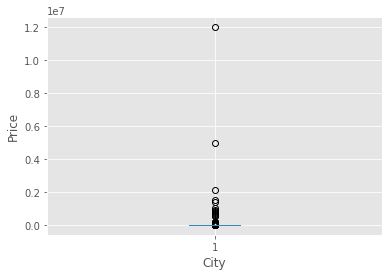

In [141]:
plt.style.use('ggplot')
plt.boxplot(casa['Price'])
#plt.boxplot(casa.Price[casa['Price']<=12762.5],'o')
plt.xlabel('City')
plt.ylabel('Price')
plt.show()

In [93]:
#OUTLIERS

In [205]:
#Method 1 : Z-SCORE

prices_casa = casa['Price']
outliers=[]

std3 = 3
mean = np.mean(prices_casa)
std = np.std(prices_casa)

for i in prices_casa:
    #Z = (X-mean) / std
    z_score = (i-mean) / std
    if np.abs(z_score) > std3:
        outliers.append(i)

#print(outliers)
#casa[casa['Price']>=min(outliers)]

minor outliers :  -2250.0 10950.0
major outliers :  -7200.0 15900.0


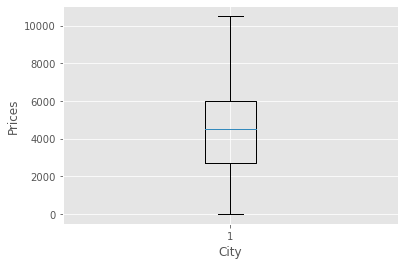

In [211]:
#Method 2 : InterQuantile Range q3-q1
# sort -> calcul (q3-q1) -> find lower bound (q1*1.5) -> find upper bound (q3*1.5) 
  # -> Anything that lies outside of lower and upper bound is an outlier.
    
prices_casa = casa['Price']
q1 = np.percentile(prices_casa,25)
q3 = np.percentile(prices_casa,75)
IQR = q3 - q1

#Inner Fence -> minor outliers.
lower_bound = q1 - (1.5*IQR)
upper_bound = q3 + (1.5*IQR)
print('minor outliers : ',lower_bound , upper_bound)

#Outer Fence -> major outliers.
lower_bound_o = q1 - (3*IQR)
upper_bound_o = q3 + (3*IQR)
print('major outliers : ',lower_bound_o,upper_bound_o)

#plot
plt.xlabel('City')
plt.ylabel('Prices')
plt.boxplot(casa.Price[casa['Price'] <= upper_bound])
plt.show()

casa = casa[casa['Price'] <= upper_bound]
casa.drop_duplicates(inplace=True)

In [159]:
casa['City1'] = casa['City'].apply(lambda x:x.split('/')[0].replace(' ',''))
casa['Street'] = casa['City'].apply(lambda x:x.split(' / ')[-1])
casa

C:\Users\pc\AppData\Local\Temp\ipykernel_6524\2316537678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casa['City1'] = casa['City'].apply(lambda x:x.split('/')[0].replace(' ',''))
C:\Users\pc\AppData\Local\Temp\ipykernel_6524\2316537678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casa['Street'] = casa['City'].apply(lambda x:x.split(' / ')[-1])


,Title,City,Price,Time,Street,City1
0,Appartement vide 150m² Florida Sidi Maarouf,Casablanca / Sidi Maarouf,6000,01 Déc 2022 13:23,Sidi Maarouf,Casablanca
1,Un appartement à louer pour un couple,Casablanca / Sidi Maarouf,4300,01 Déc 2022 10:38,Sidi Maarouf,Casablanca
2,CHERCHE APPART PRES DE FAC DE MEDECINE,Casablanca,4000,01 Déc 2022 10:38,Casablanca,Casablanca
4,Appartement à louer à Nour Californie,Casablanca / Ain Chok,6000,01 Déc 2022 10:37,Ain Chok,Casablanca
5,Un appartement à louer à lotissement hamza 100 m²,Casablanca / Sidi Maarouf,4000,01 Déc 2022 10:37,Sidi Maarouf,Casablanca
...,...,...,...,...,...,...
1825,Appartement pour location,Casablanca / Ain Sebaa,3000,22 Fév 2022 20:48,Ain Sebaa,Casablanca
1826,F3 JANAT TAMARIS DAR BOUAZZA,Casablanca,3500,22 Fév 2022 16:37,Casablanca,Casablanca
1827,APPARTEMENT A LOUER,Casablanca / Racine Extension,10000,22 Fév 2022 15:37,Racine Extension,Casablanca
1828,Appartement à louer à tadart el wajes 120 m²,Casablanca / Sidi Maarouf,6500,22 Fév 2022 13:27,Sidi Maarouf,Casablanca


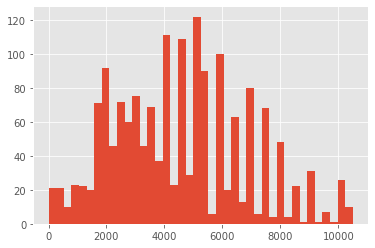

In [316]:
plt.hist(casa['Price'],bins=40)
plt.show()

# DATA CLEANING

In [423]:
def prepare(data):
    data['Price'] = data['Price'].astype('string')
    data['Price'] = data['Price'].str.replace('DH','')
    data['Price'] = data['Price'].str.replace(' ','')
    data['Price'] = pd.to_numeric(data['Price'])
    data['City1'] = data['City'].apply(lambda x:x.split('/')[0].replace(' ',''))
    data['Street'] = data['City'].apply(lambda x:x.split(' / ')[-1])
    data.drop_duplicates(inplace=True)
    #show outliers
    plt.boxplot(data['Price'])
    plt.xlabel(data['City1'].unique())
    plt.ylabel('Price')
    plt.title('Show Outliers')
    plt.show()
    return data

# Method 2 : InterQuartile Range q3-q1
# sort -> calcul (q3-q1) -> find lower bound (q1*1.5) -> find upper bound (q3*1.5) 
  #-> Anything that lies outside of lower and upper bound is an outlier. 
def inter_quartile(data):
    q1 = np.percentile(data['Price'],25)
    q3 = np.percentile(data['Price'],75)
    IQR = q3 - q1
    lower_bound = q1 - (1.5*IQR)
    upper_bound = q3 + (1.5*IQR)
    print('minor outliers : [',lower_bound,',',upper_bound,']')
    #plot
    plt.xlabel(data['City1'].unique())
    plt.ylabel('Price')
    plt.title('Without Outliers')
    plt.boxplot(data.Price[data['Price'] <= upper_bound])
    plt.show()
    data = data[data['Price'] <= upper_bound]
    return data

#Method 1 : Z-SCORE
def z_score(data):
    global outliers
    outliers=[]
    std3 = 3
    mean = np.mean(data['Price'])
    std = np.std(data['Price'])
    for i in data['Price']:
        z = (i-mean)/std
        if np.abs(z) > std3:
            outliers.append(i)
    print('outliers : ',outliers)

def clean(data):
    print(data.shape)
    data = prepare(data)
    z_score(data)
    data = inter_quartile(data)
    print(data.shape)
    return data


## Casa

(1680, 6)


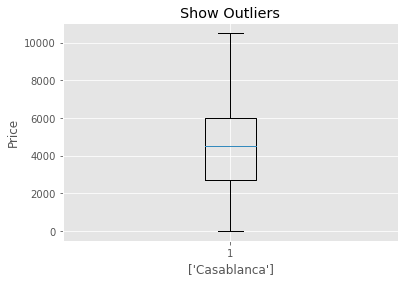

outliers :  []
minor outliers : [ -2250.0 , 10950.0 ]


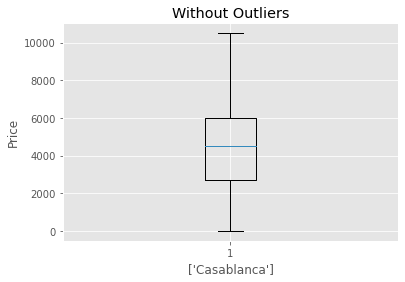

(1680, 6)


,Title,City,Price,Time,Street,City1
0,Appartement vide 150m² Florida Sidi Maarouf,Casablanca / Sidi Maarouf,6000,01 Déc 2022 13:23,Sidi Maarouf,Casablanca
1,Un appartement à louer pour un couple,Casablanca / Sidi Maarouf,4300,01 Déc 2022 10:38,Sidi Maarouf,Casablanca
2,CHERCHE APPART PRES DE FAC DE MEDECINE,Casablanca,4000,01 Déc 2022 10:38,Casablanca,Casablanca
4,Appartement à louer à Nour Californie,Casablanca / Ain Chok,6000,01 Déc 2022 10:37,Ain Chok,Casablanca
5,Un appartement à louer à lotissement hamza 100 m²,Casablanca / Sidi Maarouf,4000,01 Déc 2022 10:37,Sidi Maarouf,Casablanca
...,...,...,...,...,...,...
1825,Appartement pour location,Casablanca / Ain Sebaa,3000,22 Fév 2022 20:48,Ain Sebaa,Casablanca
1826,F3 JANAT TAMARIS DAR BOUAZZA,Casablanca,3500,22 Fév 2022 16:37,Casablanca,Casablanca
1827,APPARTEMENT A LOUER,Casablanca / Racine Extension,10000,22 Fév 2022 15:37,Racine Extension,Casablanca
1828,Appartement à louer à tadart el wajes 120 m²,Casablanca / Sidi Maarouf,6500,22 Fév 2022 13:27,Sidi Maarouf,Casablanca


In [440]:
casa = clean(casa)
casa

## RABAT

(454, 6)


C:\Users\pc\AppData\Local\Temp\ipykernel_6524\2195955589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price'] = data['Price'].astype('string')
C:\Users\pc\AppData\Local\Temp\ipykernel_6524\2195955589.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price'] = data['Price'].str.replace('DH','')
C:\Users\pc\AppData\Local\Temp\ipykernel_6524\2195955589.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

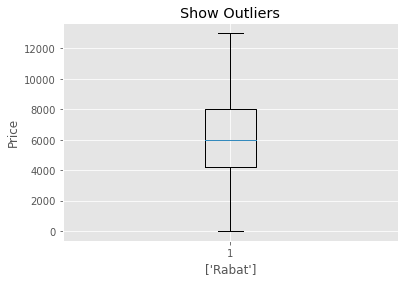

outliers :  []
minor outliers : [ -1500.0 , 13700.0 ]


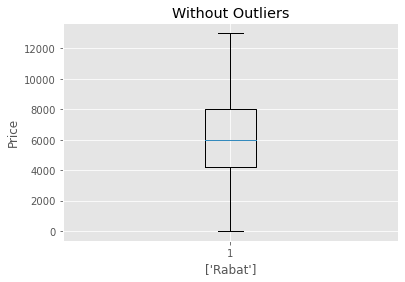

(454, 6)


,Title,City,Price,Time,City1,Street
0,Appartement prestigi à riad,Rabat / Agdal,5500,28 Nov 2022 12:49,Rabat,Agdal
1,Appartement situé tyad,Rabat / Agdal,7500,27 Nov 2022 11:54,Rabat,Agdal
3,Location appartement meublé à Hay Riad Prestigia,Rabat / Hay Ryad,10000,26 Nov 2022 17:05,Rabat,Hay Ryad
5,Appartement road,Rabat,5500,25 Nov 2022 12:06,Rabat,Rabat
7,Appartement F1 spacieux entièrement rénové,Rabat / Agdal,7000,24 Nov 2022 19:22,Rabat,Agdal
...,...,...,...,...,...,...
530,Appartement agdal avenue michlifen,Rabat / Agdal,6000,12 Jan 2022 09:40,Rabat,Agdal
531,Appartement pr étudiants ou fonctionaires,Rabat / Ocean,4000,12 Jan 2022 09:40,Rabat,Ocean
532,Appartement bien entretenue avenue michlifen A...,Rabat / Agdal,5500,12 Jan 2022 09:40,Rabat,Agdal
533,Location appartement de plage à Harhoura,Rabat / Harhoura,6000,10 Jan 2022 23:31,Rabat,Harhoura


In [439]:
rabat = clean(rabat)
rabat

## Tanger

(239, 6)


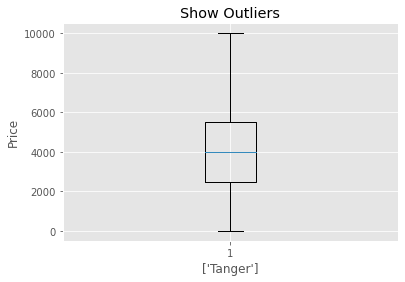

outliers :  []
minor outliers : [ -2000.0 , 10000.0 ]


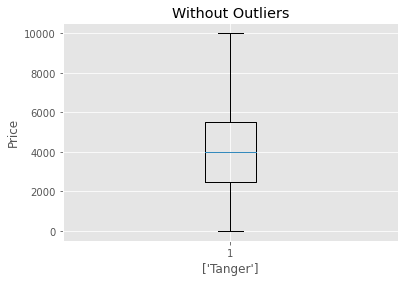

(239, 6)


,Title,City,Price,Time,City1,Street
0,Appartement no meublé pour la location,Tanger,5500,01 Nov 2022 17:37,Tanger,Tanger
1,Appartement Centre Ville En Face De Marina Bay,Tanger / Centre ville,500,01 Nov 2022 11:25,Tanger,Centre ville
2,Appartement a louée a une vue panoramique,Tanger / Centre ville,300,31 Oct 2022 10:20,Tanger,Centre ville
3,Appartement Centre Ville Prêt Mall ibn Battoutta,Tanger / Centre ville,500,26 Oct 2022 18:15,Tanger,Centre ville
4,Appartement meublé pour la location,Tanger,6500,26 Oct 2022 13:53,Tanger,Tanger
...,...,...,...,...,...,...
246,Location appartement meublé,Tanger / Malabata,3200,04 Jan 2022 16:06,Tanger,Malabata
247,Location appartement meublé,Tanger / Centre ville,4000,04 Jan 2022 15:58,Tanger,Centre ville
248,Appartement Centre Ville En Face De Marina Bay,Tanger / Centre ville,5500,04 Jan 2022 14:49,Tanger,Centre ville
249,شقة للكراء للمتزوجين فقط,Tanger / Moujahidine,2000,02 Jan 2022 19:37,Tanger,Moujahidine


In [433]:
tanger = clean(tanger)
tanger

## Marrakech

(337, 6)


C:\Users\pc\AppData\Local\Temp\ipykernel_6524\2195955589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price'] = data['Price'].astype('string')
C:\Users\pc\AppData\Local\Temp\ipykernel_6524\2195955589.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price'] = data['Price'].str.replace('DH','')
C:\Users\pc\AppData\Local\Temp\ipykernel_6524\2195955589.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

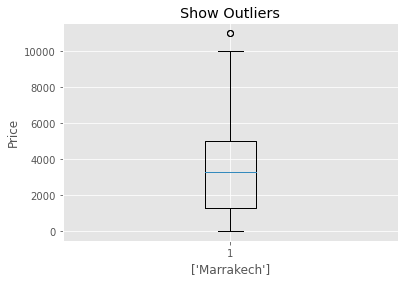

outliers :  [11000, 11000]
minor outliers : [ -4250.0 , 10550.0 ]


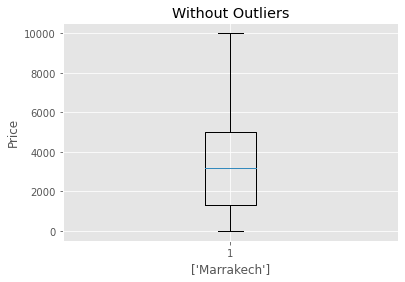

(335, 6)


,Title,City,Price,Time,City1,Street
0,Appartement Duplexe meublé 2 SDB Guéliz Majorelle,Marrakech / Gueliz,5000,16 Nov 2022 15:30,Marrakech,Gueliz
1,Chez douiria,Marrakech,300,16 Nov 2022 12:47,Marrakech,Marrakech
2,Location par mois,Marrakech / Route Amizmiz,3500,14 Nov 2022 09:49,Marrakech,Route Amizmiz
3,Bel appartement à louer,Marrakech / Daoudiat,3500,13 Nov 2022 20:28,Marrakech,Daoudiat
4,LOCATION LONGUE DUREE T3,Marrakech / Gueliz,5500,13 Nov 2022 20:23,Marrakech,Gueliz
...,...,...,...,...,...,...
352,Appartement pour location long duré,Marrakech / Autre quartier,2300,04 Jan 2022 14:56,Marrakech,Autre quartier
353,Appartement à 1200 loyer,Marrakech,1200,04 Jan 2022 14:49,Marrakech,Marrakech
354,Appart lieu calme,Marrakech,3200,03 Jan 2022 17:02,Marrakech,Marrakech
355,Appartemnt pour location al ihssan najed,Marrakech / Autre quartier,2300,03 Jan 2022 15:45,Marrakech,Autre quartier


In [438]:
marrakech = clean(marrakech)
marrakech

## Agadir

(98, 6)


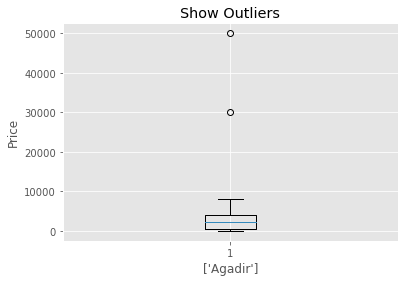

outliers :  [50000, 30000]
minor outliers : [ -4687.5 , 9212.5 ]


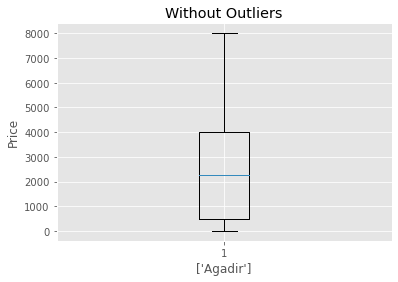

(96, 6)


,Title,City,Price,Time,City1,Street
0,Superbe appartement dans la magnifique res Yas...,Agadir / Centre ville,6500,02 Nov 2022 17:29,Agadir,Centre ville
1,Appartement adrar pour filles,Agadir,1600,01 Nov 2022 22:50,Agadir,Agadir
2,Appartement a louer à Marina d'Agadir,Agadir,1200,01 Nov 2022 09:34,Agadir,Agadir
3,Appartement à louer a El bahrya Agadir,Agadir,7000,26 Oct 2022 17:43,Agadir,Agadir
4,Appartement rdc à louer à jet sakane,Agadir,2500,25 Oct 2022 15:04,Agadir,Agadir
...,...,...,...,...,...,...
93,شقة للكراء,Agadir,2000,14 Fév 2022 07:52,Agadir,Agadir
94,Appartement neuf a louer,Agadir,2400,12 Fév 2022 12:08,Agadir,Agadir
95,Appartementà les jardins d'agadir,Agadir / Centre ville,4500,08 Fév 2022 14:35,Agadir,Centre ville
96,Appartement meublé a agadir,Agadir / Centre ville,5500,08 Fév 2022 14:35,Agadir,Centre ville


In [434]:
agadir = clean(agadir)
agadir

## Kenitra

(73, 6)


C:\Users\pc\AppData\Local\Temp\ipykernel_6524\2195955589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price'] = data['Price'].astype('string')
C:\Users\pc\AppData\Local\Temp\ipykernel_6524\2195955589.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price'] = data['Price'].str.replace('DH','')
C:\Users\pc\AppData\Local\Temp\ipykernel_6524\2195955589.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

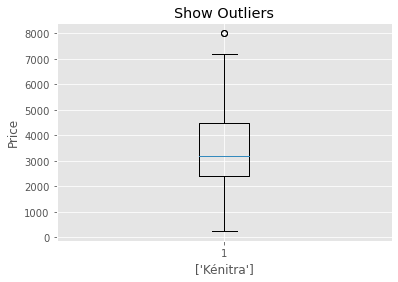

outliers :  []
minor outliers : [ -750.0 , 7650.0 ]


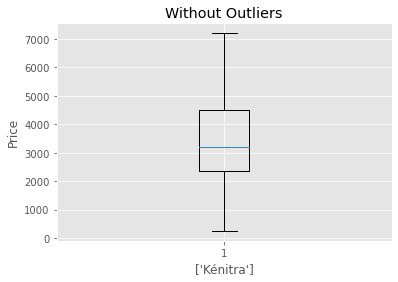

(71, 6)


,Title,City,Price,Time,City1,Street
0,Appartement haut standing à louer,Kénitra,7000,07 Nov 2022 12:25,Kénitra,Kénitra
2,ابحث عن شقة للكراء,Kénitra,2000,07 Nov 2022 10:32,Kénitra,Kénitra
3,Appartement a louer,Kénitra,550,06 Nov 2022 14:01,Kénitra,Kénitra
4,Appartement à louer ou vendre,Kénitra,3500,03 Nov 2022 20:22,Kénitra,Kénitra
6,Appartement de 86 m² au centre ville de Kénitra,Kénitra,3500,19 Oct 2022 11:02,Kénitra,Kénitra
...,...,...,...,...,...,...
74,Joli appartement à louer,Kénitra,4000,03 Jan 2022 14:20,Kénitra,Kénitra
75,Appartement Neuf Maamora,Kénitra,3400,03 Jan 2022 10:03,Kénitra,Kénitra
76,Appartement Meublé Kénitra,Kénitra,5500,02 Jan 2022 19:37,Kénitra,Kénitra
77,Appartement meublé à Kénitra,Kénitra,7200,27 Déc 15:06,Kénitra,Kénitra


In [437]:
kenitra = clean(kenitra)
kenitra

# VISUALIZATION

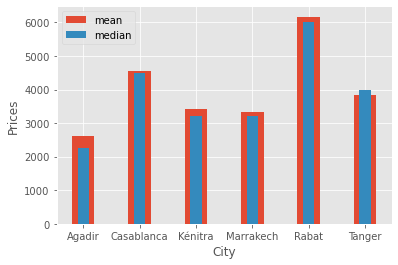

In [512]:
df = pd.concat([casa,rabat,tanger,marrakech,agadir,kenitra],ignore_index=True)
x = df.groupby('City1').mean().index
y = df.groupby('City1').mean()['Price']
y2 = df.groupby('City1').median()['Price']

plt.xlabel('City')
plt.ylabel('Prices')
plt.bar(x,y,label="mean",width=0.4)
plt.bar(x,y2,label="median",width=0.2)
plt.legend()
plt.show()

# Save clean data

In [446]:
casa.to_csv('Rent_Analysis/Clean/casa.csv')
rabat.to_csv('Rent_Analysis/Clean/rabat.csv')
tanger.to_csv('Rent_Analysis/Clean/tanger.csv')
marrakech.to_csv('Rent_Analysis/Clean/marrakech.csv')
agadir.to_csv('Rent_Analysis/Clean/agadir.csv')
kenitra.to_csv('Rent_Analysis/Clean/kenitra.csv')

In [ ]:
((1830, 4), (537, 4), (358, 4), (251, 4), (98, 4), (79, 4))

In [450]:
casa.shape , rabat.shape , marrakech.shape , tanger.shape , agadir.shape , kenitra.shape

((1680, 6), (454, 6), (335, 6), (239, 6), (96, 6), (71, 6))

In [457]:
pd.read_csv('Rent_Analysis/Clean/kenitra.csv')

,Unnamed: 0,Title,City,Price,Time,City1,Street
0,0,Appartement haut standing à louer,Kénitra,7000,07 Nov 2022 12:25,Kénitra,Kénitra
1,2,ابحث عن شقة للكراء,Kénitra,2000,07 Nov 2022 10:32,Kénitra,Kénitra
2,3,Appartement a louer,Kénitra,550,06 Nov 2022 14:01,Kénitra,Kénitra
3,4,Appartement à louer ou vendre,Kénitra,3500,03 Nov 2022 20:22,Kénitra,Kénitra
4,6,Appartement de 86 m² au centre ville de Kénitra,Kénitra,3500,19 Oct 2022 11:02,Kénitra,Kénitra
...,...,...,...,...,...,...,...
66,74,Joli appartement à louer,Kénitra,4000,03 Jan 2022 14:20,Kénitra,Kénitra
67,75,Appartement Neuf Maamora,Kénitra,3400,03 Jan 2022 10:03,Kénitra,Kénitra
68,76,Appartement Meublé Kénitra,Kénitra,5500,02 Jan 2022 19:37,Kénitra,Kénitra
69,77,Appartement meublé à Kénitra,Kénitra,7200,27 Déc 15:06,Kénitra,Kénitra
